# Here we look at the analytic expressions derived in the paper for the time-averaged $\cos^2{\theta}$ when $T = $ integer number of days

In [2]:
from numpy import *
from PlotFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import random
from tqdm import tqdm
from scipy.integrate import cumtrapz
from scipy.special import erf
from scipy.stats import percentileofscore
from scipy.optimize import fsolve

def FindPercentile(costh_samples,nbins=500):
    h,ce = histogram(costh_samples,nbins)
    cc = (ce[1:]+ce[0:-1])/2
    
    P_costh = h/sum(h) 
    
    fs = lambda P0 : 0.05-sum(0.5*(1+erf(-P0*cc/sqrt(2)))*P_costh)
    res = fsolve(fs,1.64*3)
    cval_excl = 1.64/res
    
    fs = lambda P0 : 0.05-sum(0.5*(1+erf((5-P0*cc)/sqrt(2)))*P_costh)
    res = fsolve(fs,1.64*3+5)
    cval_disc = (5+1.64)/res
    return cval_excl,cval_disc


In [3]:
# Random DP polarisations sampled isotropically
ngen = 100000
costh = 2*random.uniform(size=ngen)-1
th = arccos(costh)
cos2th = cos(2*th)

# Analytic results (see mathematica notebook for derivation)
costh_av_Z = lambda lat : (1/8)*(3+cos(2*th)-(1+3*cos(2*th))*cos(2*lat*pi/180))
costh_av_N = lambda lat : (1/8)*(3+cos(2*lat*pi/180)+(1+3*cos(2*lat*pi/180))*cos(2*th))
costh_av_W = lambda lat : (sin(th)**2)/2

# Loop over latitudes to show the dependence on lat
nloc = 1000
lats = linspace(-90,90,nloc)
val_excl_N = zeros(shape=nloc)
val_excl_Z = zeros(shape=nloc)
val_excl_W = zeros(shape=nloc)
val_disc_N = zeros(shape=nloc)
val_disc_Z = zeros(shape=nloc)
val_disc_W = zeros(shape=nloc)
# For each latitude calculate 5th percentile 
# i.e. the value above which 95% of the distribution lies
for i in tqdm(range(0,nloc)):
    Z = costh_av_Z(lats[i])
    N = costh_av_N(lats[i])
    W = costh_av_W(lats[i])
    val_excl_N[i],val_disc_N[i] = FindPercentile(N)
    val_excl_W[i],val_disc_W[i] = FindPercentile(W)
    val_excl_Z[i],val_disc_Z[i] = FindPercentile(Z)

100%|██████████| 1000/1000 [00:09<00:00, 105.10it/s]


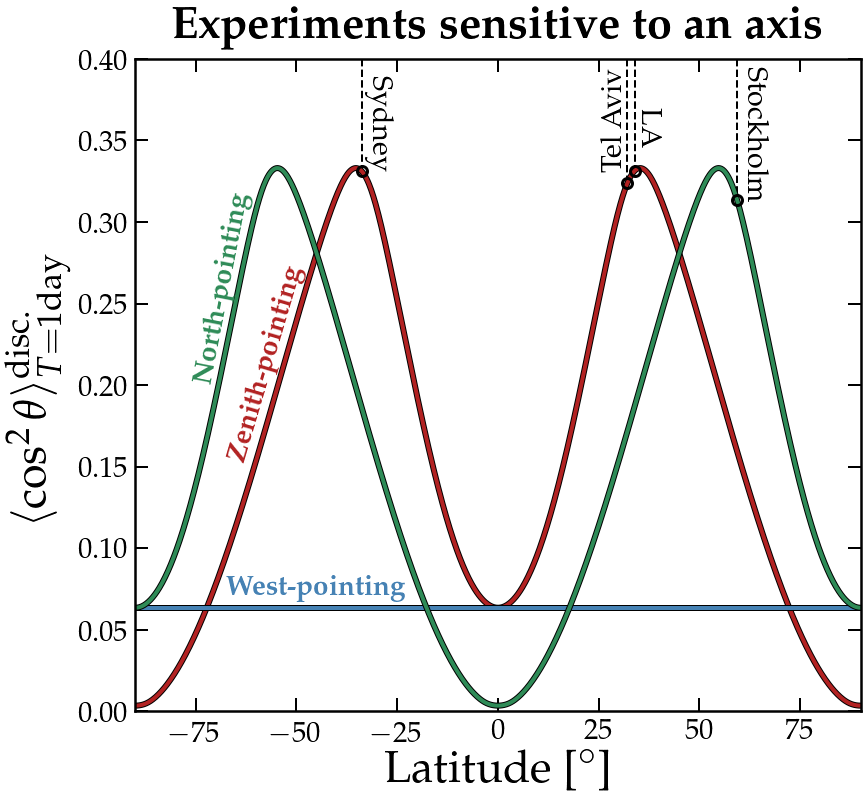

In [4]:
import matplotlib.patheffects as pe
pek=[pe.Stroke(linewidth=6, foreground='k',alpha=1), pe.Normal()]

# Set up figure
fig,ax = MySquarePlot('Latitude [$^\circ$]',r'$\langle \cos^2{\theta}\rangle^{\rm disc.}_{T = 1{\rm day}}$',tfs=29)

# Plot lines
plt.plot(lats,val_disc_Z,'-',lw=4,color='firebrick',path_effects=pek)
plt.plot(lats,val_disc_W,'-',lw=4,color='steelblue',path_effects=pek)
plt.plot(lats,val_disc_N,'-',lw=4,color='SeaGreen',path_effects=pek)

# Location labels
Sydney = -33.86
LA = 34.0522
TelAviv = 32.0853
Stockholm = 59.3293
plt.text(Sydney+4.5,0.39,'Sydney',va='center',rotation_mode='anchor',rotation=-90)
plt.text(LA+3,0.37,'LA',va='center',rotation_mode='anchor',rotation=-90)
plt.text(TelAviv-3,0.33,'Tel Aviv',va='center',rotation_mode='anchor',rotation=90)
plt.text(Stockholm+4,0.395,'Stockholm',va='center',rotation_mode='anchor',rotation=-90)


# Plot location lines connected to the other lines
plt.plot([Sydney,Sydney],[0.4,val_disc_Z[argmin(abs(Sydney-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Sydney,val_disc_Z[argmin(abs(Sydney-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([TelAviv,TelAviv],[0.4,val_disc_Z[argmin(abs(TelAviv-lats))]],'k--',lw=2,zorder=-10)
plt.plot(TelAviv,val_disc_Z[argmin(abs(TelAviv-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([LA,LA],[0.4,val_disc_Z[argmin(abs(LA-lats))]],'k--',lw=2,zorder=-10)
plt.plot(LA,val_disc_Z[argmin(abs(LA-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([Stockholm,Stockholm],[0.4,val_disc_N[argmin(abs(Stockholm-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Stockholm,val_disc_N[argmin(abs(Stockholm-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

# Labels
plt.text(lats[150]*(1+0.08),val_disc_Z[150]*(1+0.2),r'{\bf Zenith-pointing}',color='firebrick',rotation=73.5,fontsize=28)
plt.text(lats[125],val_disc_W[120]*(1+0.135),r'{\bf West-pointing}',color='steelblue',rotation=0,fontsize=28)
plt.text(lats[100]*(1+0.06),val_disc_N[100]*(1+0.2),r'{\bf North-pointing}',color='SeaGreen',rotation=79,fontsize=28)

plt.gcf().text(0.0,0.5,'w',color='w',zorder=-1000) #<--- this is to stop the ylabel being partially cut off

plt.xlim([-90,90])
plt.ylim([0,0.4])
plt.title(r'{\bf Experiments sensitive to an axis}',fontsize=45,pad=20)

MySaveFig(fig,'LocationDependence')

# Now plot the values we just calculated

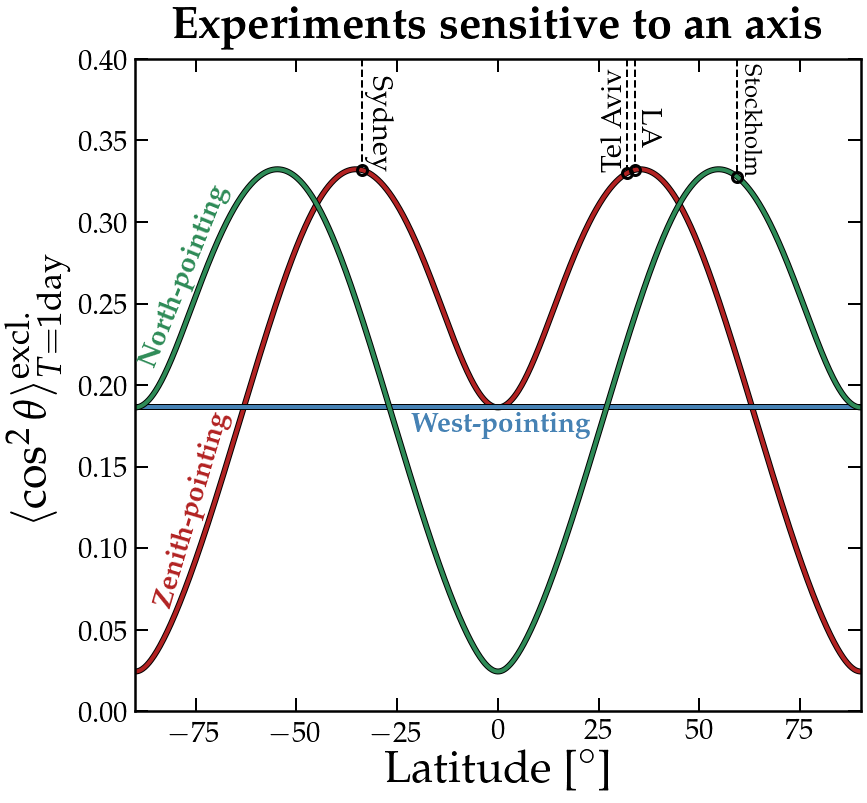

In [7]:
import matplotlib.patheffects as pe
pek=[pe.Stroke(linewidth=6, foreground='k',alpha=1), pe.Normal()]

# Set up figure
fig,ax = MySquarePlot('Latitude [$^\circ$]',r'$\langle \cos^2{\theta}\rangle^{\rm excl.}_{T = 1{\rm day}}$',tfs=29)

# Plot lines
plt.plot(lats,val_excl_Z,'-',lw=4,color='firebrick',path_effects=pek)
plt.plot(lats,val_excl_W,'-',lw=4,color='steelblue',path_effects=pek)
plt.plot(lats,val_excl_N,'-',lw=4,color='SeaGreen',path_effects=pek)


# Location labels
Sydney = -33.86
LA = 34.0522
TelAviv = 32.0853
Stockholm = 59.3293
plt.text(Sydney+4.5,0.39,'Sydney',va='center',rotation_mode='anchor',rotation=-90)
plt.text(LA+3,0.37,'LA',va='center',rotation_mode='anchor',rotation=-90)
plt.text(TelAviv-3,0.33,'Tel Aviv',va='center',rotation_mode='anchor',rotation=90)
plt.text(Stockholm+3,0.397,'Stockholm',va='center',rotation_mode='anchor',rotation=-90,fontsize=24)


# Plot location lines connected to the other lines
plt.plot([Sydney,Sydney],[0.4,val_excl_Z[argmin(abs(Sydney-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Sydney,val_excl_Z[argmin(abs(Sydney-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([TelAviv,TelAviv],[0.4,val_excl_Z[argmin(abs(TelAviv-lats))]],'k--',lw=2,zorder=-10)
plt.plot(TelAviv,val_excl_Z[argmin(abs(TelAviv-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([LA,LA],[0.4,val_excl_Z[argmin(abs(LA-lats))]],'k--',lw=2,zorder=-10)
plt.plot(LA,val_excl_Z[argmin(abs(LA-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([Stockholm,Stockholm],[0.4,val_excl_N[argmin(abs(Stockholm-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Stockholm,val_excl_N[argmin(abs(Stockholm-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

# Labels
plt.text(lats[100]*(1+0.2),val_excl_Z[100]*(1-0.43),r'{\bf Zenith-pointing}',color='firebrick',rotation=73.5,fontsize=28)
plt.text(lats[380],val_excl_W[380]*(1-0.08),r'{\bf West-pointing}',color='steelblue',rotation=0,fontsize=28)
plt.text(lats[20]*(1+0.045),val_excl_N[20]*(1+0.11),r'{\bf North-pointing}',color='SeaGreen',rotation=68,fontsize=28)

plt.gcf().text(0.0,0.5,'w',color='w',zorder=-1000) #<--- this is to stop the ylabel being partially cut off

plt.xlim([-90,90])
plt.ylim([0,0.4])
plt.title(r'{\bf Experiments sensitive to an axis}',fontsize=45,pad=20)

MySaveFig(fig,'LocationDependence_excl')

# Do exactly the same but for the planar experiments

In [110]:
costh_av_ZW = lambda lat : (1/8)*(5-cos(2*lat*pi/180)-(1+3*cos(2*lat*pi/180))*cos(2*th)) # North-facing
costh_av_ZN = lambda lat : (1/4)*(3+cos(2*th)) # West-facing
costh_av_NW = lambda lat : (1/8)*(5+cos(2*lat*pi/180)+(-1+3*cos(2*lat*pi/180))*cos(2*th)) # Zenith-facing

nloc = 1000
lats = linspace(-90,90,nloc)
val_excl_NW = zeros(shape=nloc)
val_excl_ZW = zeros(shape=nloc)
val_excl_ZN = zeros(shape=nloc)
val_disc_NW = zeros(shape=nloc)
val_disc_ZW = zeros(shape=nloc)
val_disc_ZN = zeros(shape=nloc)

for i in tqdm(range(0,nloc)):
    NW = costh_av_NW(lats[i])
    ZW = costh_av_ZW(lats[i])
    ZN = costh_av_ZN(lats[i])

    val_excl_NW[i],val_disc_NW[i] = FindPercentile(NW)
    val_excl_ZW[i],val_disc_ZW[i] = FindPercentile(ZW)
    val_excl_ZN[i],val_disc_ZN[i] = FindPercentile(ZN)

100%|██████████| 1000/1000 [00:08<00:00, 113.86it/s]


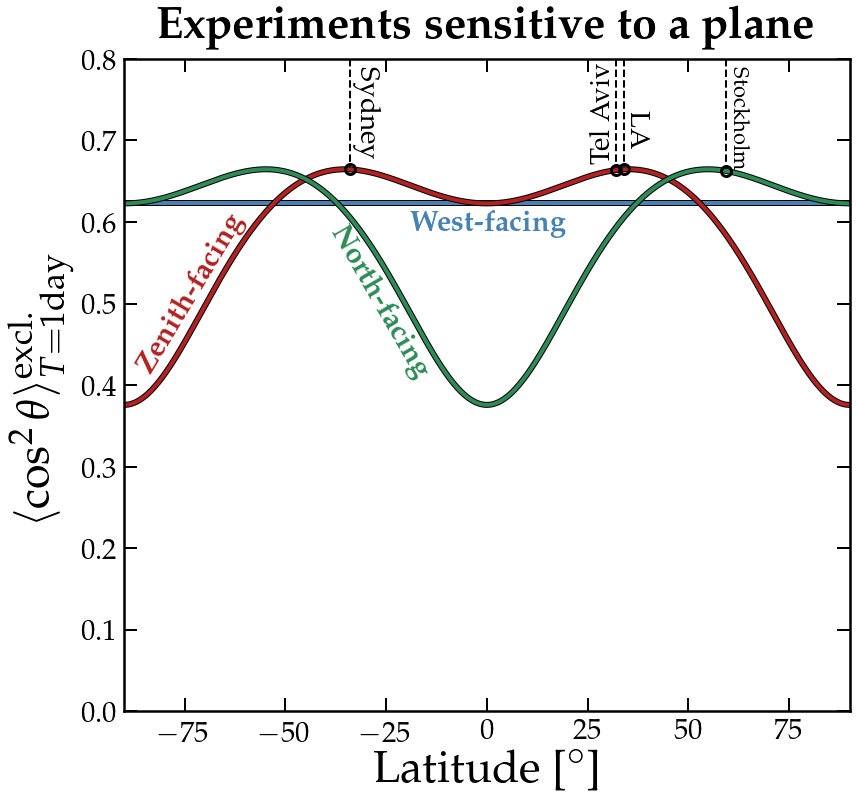

In [163]:
ymax = 0.8

fig,ax = MySquarePlot('Latitude [$^\circ$]',r'$\langle \cos^2{\theta}\rangle^{\rm excl.}_{T = 1{\rm day}}$',tfs=29)
plt.plot(lats,val_excl_NW,'-',lw=4,color='firebrick',path_effects=pek)
plt.plot(lats,val_excl_ZN,'-',lw=4,color='steelblue',path_effects=pek,zorder=-1)
plt.plot(lats,val_excl_ZW,'-',lw=4,color='seagreen',path_effects=pek)


plt.text(Sydney+4,ymax-0.01,'Sydney',va='center',rotation_mode='anchor',rotation=-90,fontsize=28)
plt.text(LA+3,ymax*(1-0.08),'LA',va='center',rotation_mode='anchor',rotation=-90,fontsize=28)
plt.text(TelAviv-3,ymax-0.13,'Tel Aviv',va='center',rotation_mode='anchor',rotation=90,fontsize=28)
plt.text(Stockholm+3,ymax-0.01,'Stockholm',va='center',rotation_mode='anchor',rotation=-90,fontsize=22)



plt.plot([Sydney,Sydney],[ymax,val_excl_NW[argmin(abs(Sydney-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Sydney,val_excl_NW[argmin(abs(Sydney-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([TelAviv,TelAviv],[ymax,val_excl_NW[argmin(abs(TelAviv-lats))]],'k--',lw=2,zorder=-10)
plt.plot(TelAviv,val_excl_NW[argmin(abs(TelAviv-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([LA,LA],[ymax,val_excl_NW[argmin(abs(LA-lats))]],'k--',lw=2,zorder=-10)
plt.plot(LA,val_excl_NW[argmin(abs(LA-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([Stockholm,Stockholm],[ymax,val_excl_ZW[argmin(abs(Stockholm-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Stockholm,val_excl_ZW[argmin(abs(Stockholm-lats))],'o',color='k',markersize=10,mfc='none',mew=3)


plt.text(lats[10],val_excl_NW[10]+0.04,r'{\bf Zenith-facing}',color='firebrick',rotation=59)
plt.text(lats[500],val_excl_ZN[500]-0.025,r'{\bf West-facing}',color='steelblue',rotation=0,ha='center',va='center')
plt.text(lats[360]-15,val_excl_ZW[360]-0.13,r'{\bf North-facing}',color='seagreen',rotation=-60)

plt.gcf().text(0.0,0.5,'w',color='w',zorder=-1000)
#plt.axhline(1/3,color='k',lw=2.5,alpha=0.4)
plt.xlim([-90,90])
plt.ylim([0,ymax])
plt.title(r'{\bf Experiments sensitive to a plane}',fontsize=45,pad=20)

MySaveFig(fig,'LocationDependence_2D_excl')

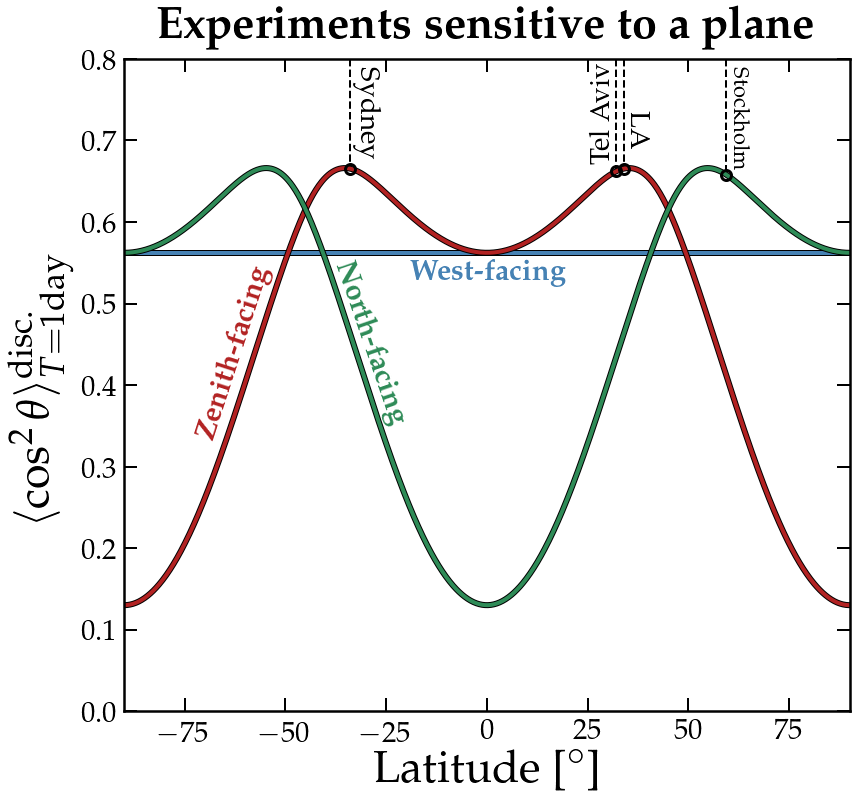

In [164]:
ymax = 0.8

fig,ax = MySquarePlot('Latitude [$^\circ$]',r'$\langle \cos^2{\theta}\rangle^{\rm disc.}_{T = 1{\rm day}}$',tfs=29)
plt.plot(lats,val_disc_NW,'-',lw=4,color='firebrick',path_effects=pek)
plt.plot(lats,val_disc_ZN,'-',lw=4,color='steelblue',path_effects=pek,zorder=-1)
plt.plot(lats,val_disc_ZW,'-',lw=4,color='seagreen',path_effects=pek)


plt.text(Sydney+4,ymax-0.01,'Sydney',va='center',rotation_mode='anchor',rotation=-90,fontsize=28)
plt.text(LA+3,ymax*(1-0.08),'LA',va='center',rotation_mode='anchor',rotation=-90,fontsize=28)
plt.text(TelAviv-3,ymax-0.13,'Tel Aviv',va='center',rotation_mode='anchor',rotation=90,fontsize=28)
plt.text(Stockholm+3,ymax-0.01,'Stockholm',va='center',rotation_mode='anchor',rotation=-90,fontsize=22)



plt.plot([Sydney,Sydney],[ymax,val_disc_NW[argmin(abs(Sydney-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Sydney,val_disc_NW[argmin(abs(Sydney-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([TelAviv,TelAviv],[ymax,val_disc_NW[argmin(abs(TelAviv-lats))]],'k--',lw=2,zorder=-10)
plt.plot(TelAviv,val_disc_NW[argmin(abs(TelAviv-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([LA,LA],[ymax,val_disc_NW[argmin(abs(LA-lats))]],'k--',lw=2,zorder=-10)
plt.plot(LA,val_disc_NW[argmin(abs(LA-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([Stockholm,Stockholm],[ymax,val_disc_ZW[argmin(abs(Stockholm-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Stockholm,val_disc_ZW[argmin(abs(Stockholm-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.text(lats[120]*(1+0.07),val_disc_NW[120]*(1+0.2),r'{\bf Zenith-facing}',color='firebrick',rotation=72)
plt.text(lats[500],val_disc_ZN[500]-0.025,r'{\bf West-facing}',color='steelblue',rotation=0,ha='center',va='center')
plt.text(lats[350]-12,val_disc_ZW[350],r'{\bf North-facing}',color='seagreen',rotation=-71)

plt.gcf().text(0.0,0.5,'w',color='w',zorder=-1000)
#plt.axhline(1/3,color='k',lw=2.5,alpha=0.4)
plt.xlim([-90,90])
plt.ylim([0,ymax])
plt.title(r'{\bf Experiments sensitive to a plane}',fontsize=45,pad=20)

MySaveFig(fig,'LocationDependence_2D')

## 